### Michelle Kouba
### Predicting Housing Prices - Linear Regression with PCA

In [ ]:
# Import libraries
import pandas as pd
import string
import numpy as np
from sklearn import metrics
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import and inspect dataframe
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preparation

In [ ]:
# Dropping the ID column and any column missing more than 40% of its values.
# Dropping ID
housing_df = housing_df[housing_df.columns[1:]]
# Checking how many variables and respondents we have.
housing_df.shape

(1460, 80)

In [ ]:
# We have 80 variables and 1460 respondents.
# Checking for any variables that are missing more than 40% of its values.
housing_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<AxesSubplot:>

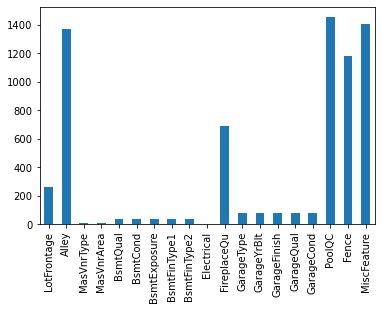

In [ ]:
# Plotting all null values columns because I can't see them.
housing_df.isna().sum()[housing_df.isna().sum()>0].plot(kind='bar')

In [ ]:
# Can't see all the variables or figure out how to scroll the output (seriously???)
# Trying a different approach.
pct_null = housing_df.isnull().sum() / len(housing_df)
missing_features = pct_null[pct_null > 0.40].index
housing_df.drop(missing_features, axis=1, inplace=True)

In [ ]:
# We lost five variables with more than 40% missing data. Other than LoftFrontage,
# most variables are missing minimal/no data.
# They are fireplace, alley, poolQC, fence and MiscFeature.

In [ ]:
# We now have 75 columns/variables.
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Splitting the database into two types of columns since we are doing different
# substitutions with the numerical (mean) columns and the categorical columns (mode).
numeric_columns = housing_df.select_dtypes(include=np.number)
categorical_columns = housing_df.select_dtypes(include=['object'])

In [ ]:
# Importing function that will easily allow for the replacement of NaN with
# modes or means. (or "median")
from sklearn.impute import SimpleImputer
# Will replace numerical columns with mean.
numerical_imputer = SimpleImputer(strategy="mean")
# Will replace categorical columns with mode/most frequent.
categorical_imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Replacing numerical columns with mean.
numerical_imputer.fit(numeric_columns)

SimpleImputer()

In [ ]:
# Replacing categorical columns with most frequent answer.
categorical_imputer.fit(categorical_columns)

SimpleImputer(strategy='most_frequent')

In [ ]:
# Getting numeric data transformed and ready to merge back together.
X1 = numerical_imputer.transform(numeric_columns)
numeric_columns = pd.DataFrame(X1, columns=numeric_columns.columns)

In [ ]:
# Getting categorical data transformed and ready to merge back together.
X2 = categorical_imputer.transform(categorical_columns)
categorical_columns = pd.DataFrame(X2, columns=categorical_columns.columns)

In [ ]:
# Creating dummy columns for all the categorical variables
categorical_columns = pd.get_dummies(categorical_columns)

In [ ]:
# Merging numeric and categorical columns back together
df = pd.concat([numeric_columns, categorical_columns],axis=1)
# Dropping duplicates
df = df.drop_duplicates()

## Linear Regression

In [ ]:
# Creating X and Y variables for analysis.
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [ ]:
# Splitting the dataset into the training set and the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Running a linear regression on the test set.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_test, y_test)

LinearRegression()

In [ ]:
# Predicting the Testing set results
y_pred = lr.predict(X_test)

## Model Metrics

In [ ]:
# Calculating the R squared value of the test set.
from sklearn.metrics import r2_score
print('The R-squared of the test set is',r2_score(y_test, y_pred))

The R-squared of the test set is 0.977023466030708


This seems very very high most likely due to the high number of variables and the model being overfit.

In [ ]:
# Calculating the RMSE on the test set.
from sklearn.metrics import mean_squared_error
#setting squared=False to get the RMSE
print('The RMSE of the test set is', mean_squared_error(y_test, y_pred, squared=False))

The RMSE of the test set is 12596.527151749475


## Linear Regression with PCA and Scaling (Ran with StandardScaler, then MinMax)

In [ ]:
# Running a PCA on the training data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Standardize the feature matrix
sc = StandardScaler()
training_features = sc.fit_transform(X_train)

In [ ]:
# Create a PCA that will retain 90% of the variance
pca = PCA(n_components=.90, whiten=True)

In [ ]:
# Running PCA
features_pca = pca.fit_transform(training_features)

In [ ]:
# Showing results
print('Original number of features:', training_features.shape[1])
print('Reduced number of features:', features_pca.shape[1])

Original number of features: 270
Reduced number of features: 138


There are 138 features in the transformed matrix which is much easier to work with (nearly half of what we started with).

In [ ]:
# Transforming but NOT fitting the test features with the same PCA.
testing_features = sc.transform(X_test)
features_pca = pca.transform(testing_features)

In [ ]:
# Running a linear regression on the PCA transformed data.
lr = LinearRegression()
lr.fit(features_pca, y_test)
y_pred = lr.predict(features_pca)

In [ ]:
# Calculating the R squared value of the PCA transformed data.
print('The R-squared of the PCA transformed data is',r2_score(y_test, y_pred))

The R-squared of the PCA transformed data is 0.9252346811923877


So as expected, the expected variance of the model drops when we extracted half of the variables; however, this was very useful because in real life scenarios even 135 variables is ridiculous.

In [ ]:
# Calculating the RMSE on the PCA transformed data.
#setting squared=False to get the RMSE
print('The RMSE of the test set is', mean_squared_error(y_test, y_pred, squared=False))

The RMSE of the test set is 22722.63352246532


In [ ]:
# Using the original training features and running a min-max scaler on them.
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(X_train)

In [ ]:
# Finding variables that have 10% of the variance explained or higher
from sklearn.feature_selection import VarianceThreshold
# Create threshold to "select" features (.10)
thresholder = VarianceThreshold(threshold=.10)
features_high_variance = thresholder.fit_transform(scaled)
# Showing results
print('Original number of features in training set:', X_train.shape[1])
print('Reduced number of features after min max scaler:', features_high_variance.shape[1])

Original number of features: 270
Reduced number of features: 50


In [ ]:
# Transforming but NOT fitting the test features with the min-max scaler.
min_max_features = sc.transform(features_high_variance)
# Create a PCA that will retain 90% of the variance
pca = PCA(n_components=.90, whiten=True)
features_pca = pca.fit_transform(min_max_features)

In [ ]:
# Running a linear regression on the PCA transformed (min max scaler) data.
lr = LinearRegression()
lr.fit(features_pca, y_train)
y_pred = lr.predict(features_pca)

In [ ]:
# Calculating the R squared value of the PCA transformed data.
print('The R-squared of the data is',r2_score(y_train, y_pred))

The R-squared of the data is 0.5743068817551675


In [ ]:
# Calculating the RMSE on the PCA transformed data.
#setting squared=False to get the RMSE
print('The RMSE of the test set is', mean_squared_error(y_train, y_pred, squared=False))

The RMSE of the test set is 51195.46445936416


So it appears that using all 270 variables as predictors VASTLY overfits the model but it's very very impractical and overfitting isn't ideal as it will only apply to this data set and will grossly underestimate/overestimate other data in the future.  Plus it's highly inefficient to need to collect 270 pieces of information about a home in order to predict it's selling price.   So using the PCA with a standard scaler we were able to cut the variables predicting the data in half and only really lose a little bit of variance explained (from 97.7 to 92.5).   Using a min max scaler where we only used variables that were highly correlated to Sales Price (much less, 50 variables in total) we were able to explain roughly 57.4 of the variance.  Cutting the size of the predictor variables from 150 to 50 was more efficient as far as not overfitting a model, but at the same time, you lost a good amount of variance explained (thus the ability to accurately predict the Sales Price).